# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhamad Rafli Gunawan
- **Email:** m010b4ky2655@bangkit.academy
- **ID Dicoding:** rafli_gunawan20

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : How is temperature affect bike sharing business?
- Pertanyaan 2 : What is the most profitable season for bike sharing business?

## Import Semua Packages/Library yang Digunakan

In [1]:
# The packages and library we will use
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os

## Data Wrangling

### Gathering Data

In [2]:
# Get the directory where the script is located
script_dir = os.getcwd()

# Define relative paths to the data files
day_file_path = os.path.join(script_dir, 'data', 'day.csv')
hour_file_path = os.path.join(script_dir, 'data', 'hour.csv')
readme_file_path = os.path.join(script_dir, 'data', 'Readme.txt')


In [3]:
# Read Readme.txt
with open(readme_file_path, 'r') as f:
    text = f.read()
print(text)

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

In [4]:
# Check the first 5 line of hour.csv
hour = pd.read_csv(hour_file_path)
print(hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [5]:
# Check the first 5 line of day.csv
day = pd.read_csv(day_file_path)
print(day.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


**Insight:**
- There's 3 file in Bike-sharing-dataset.zip, which is Readme.txt, hour.csv, dan, dan day.csv
- Readme.txt : explanation about the text
- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
- day.csv : bike sharing counts aggregated on daily basis. Records: 731 days
- Because the data are essentialy the same, only different in time scale, we can just use one data instead of merge it
- We will use day.csv as data

### Assessing Data

In [6]:
# To make it not confusing we will define day as data
data = day

In [ ]:
# Check for missing value
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# Check for duplicate data
data.duplicated().sum()

np.int64(0)

In [9]:
# Check for outlier

# Define a function to detect outliers using the IQR method
def detect_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in the dataset
outliers = detect_outliers(data)

# Print the columns with outliers
for column, outlier_data in outliers.items():
    if not outlier_data.empty:
        print(f"Outliers detected in column '{column}':")
        print(outlier_data)


Outliers detected in column 'holiday':
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
16        17  2011-01-17       1   0     1        1        1           0   
51        52  2011-02-21       1   0     2        1        1           0   
104      105  2011-04-15       2   0     4        1        5           0   
149      150  2011-05-30       2   0     5        1        1           0   
184      185  2011-07-04       3   0     7        1        1           0   
247      248  2011-09-05       3   0     9        1        1           0   
282      283  2011-10-10       4   0    10        1        1           0   
314      315  2011-11-11       4   0    11        1        5           0   
327      328  2011-11-24       4   0    11        1        4           0   
359      360  2011-12-26       1   0    12        1        1           0   
366      367  2012-01-02       1   1     1        1        1           0   
380      381  2012-01-16       1   1     1       

**Insight:**
- There's no missing value in day.csv
- There's no duplicate data in day.csv
- There's a lot of outlier in day.csv

### Cleaning Data

In [10]:
# Since there's no missing value and duplicate, there's no need for us to clean them.
# However let's just do it just to make sure

data.dropna(axis=0, inplace=True)
data.drop_duplicates(inplace=True)

In [11]:
# Clean the data from outlier

# Define a function to detect and remove outliers using the IQR method
def remove_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the dataset
data = remove_outliers(data)


**Insight:**
- We already cleaned data from missing value, duplicates, and outliers

## Exploratory Data Analysis (EDA)

### Exploring Statistical Parameter from Data

In [12]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,655.000000,655.000000,655.000000,655.000000,655.0,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.00000,655.000000,655.000000
mean,357.366412,2.506870,0.474809,6.545038,0.0,2.993893,0.748092,1.407634,0.491363,0.470946,0.633358,0.186224,737.60000,3660.157252,4397.757252
std,211.948901,1.118184,0.499747,3.482684,0.0,1.929164,0.434441,0.550454,0.185020,0.164436,0.140990,0.072228,522.93126,1570.067857,1854.957213
min,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.022392,2.00000,20.000000,22.000000
25%,174.500000,1.500000,0.000000,3.500000,0.0,1.000000,0.000000,1.000000,0.330833,0.329850,0.524900,0.133721,303.50000,2506.500000,3129.000000
50%,348.000000,3.000000,0.000000,7.000000,0.0,3.000000,1.000000,1.000000,0.485833,0.474117,0.630833,0.176625,684.00000,3643.000000,4456.000000
75%,544.500000,3.000000,1.000000,10.000000,0.0,5.000000,1.000000,2.000000,0.653750,0.607960,0.734583,0.230723,1028.00000,4737.000000,5651.000000
max,731.000000,4.000000,1.000000,12.000000,0.0,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.378108,2258.00000,6946.000000,8173.000000


In [13]:
data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,655.000000,655,655.000000,655.000000,655.000000,655.0,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.00000,655.000000,655.000000
unique,NaN,655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,357.366412,NaN,2.506870,0.474809,6.545038,0.0,2.993893,0.748092,1.407634,0.491363,0.470946,0.633358,0.186224,737.60000,3660.157252,4397.757252
std,211.948901,NaN,1.118184,0.499747,3.482684,0.0,1.929164,0.434441,0.550454,0.185020,0.164436,0.140990,0.072228,522.93126,1570.067857,1854.957213
min,1.000000,NaN,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.022392,2.00000,20.000000,22.000000
25%,174.500000,NaN,1.500000,0.000000,3.500000,0.0,1.000000,0.000000,1.000000,0.330833,0.329850,0.524900,0.133721,303.50000,2506.500000,3129.000000
50%,348.000000,NaN,3.000000,0.000000,7.000000,0.0,3.000000,1.000000,1.000000,0.485833,0.474117,0.630833,0.176625,684.00000,3643.000000,4456.000000
75%,544.500000,NaN,3.000000,1.000000,10.000000,0.0,5.000000,1.000000,2.000000,0.653750,0.607960,0.734583,0.230723,1028.00000,4737.000000,5651.000000


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

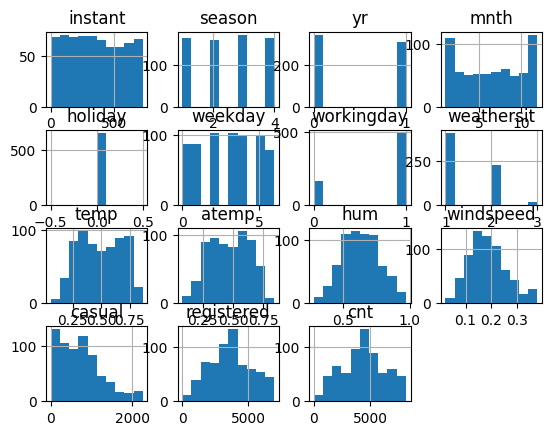

In [14]:
data.hist()

**Insight:**
- We got statictical parameter from the data
- We got histogram of the data

## Visualization & Explanatory Analysis

### Pertanyaan 1: How is temperature affect bike sharing business?

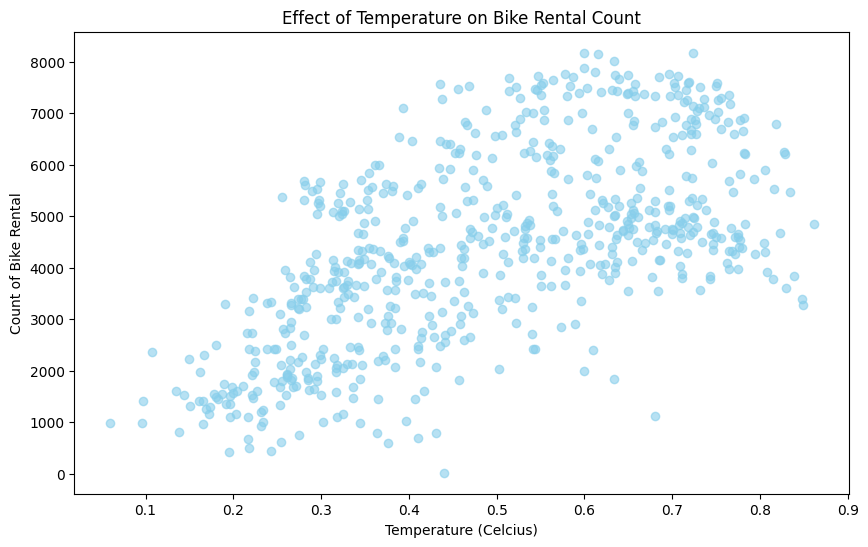

In [15]:
# Plot a scatter plot to show the relationship between 'temp' and 'cnt'
plt.figure(figsize=(10, 6))
plt.scatter(data['temp'], data['cnt'], color='skyblue', alpha=0.6)

# Add labels and title
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Count of Bike Rental')
plt.title('Effect of Temperature on Bike Rental Count')

# Display the plot
plt.show()

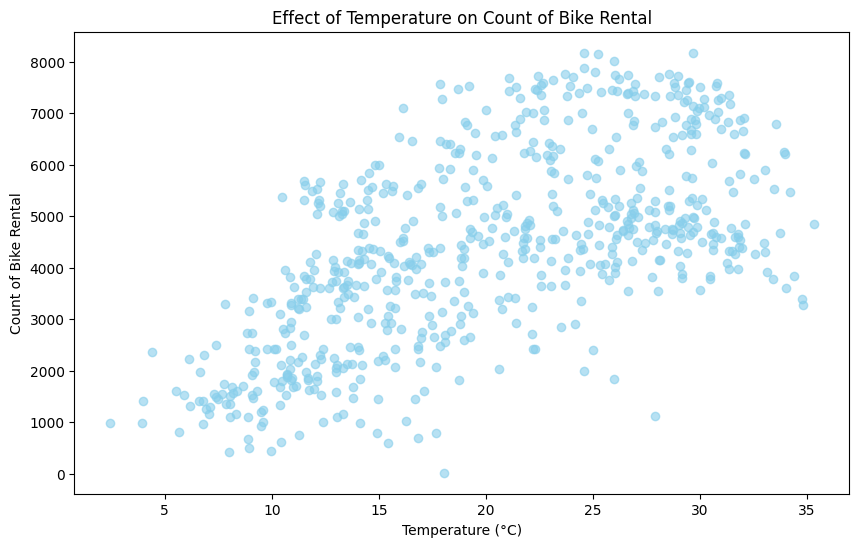

In [16]:
# Convert normalized temp to actual temperature in Celsius
data['temp_celsius'] = data['temp'] * 41

# Plot a scatter plot to show the relationship between actual temperature and cnt
plt.figure(figsize=(10, 6))
plt.scatter(data['temp_celsius'], data['cnt'], color='skyblue', alpha=0.6)

# Add labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Count of Bike Rental')
plt.title('Effect of Temperature on Count of Bike Rental')

# Display the plot
plt.show()


**Insight:**
- The most optimal temperature for bike sharing business is 25 degree celcius. The closer temperature to 25 degree celcius the higher count of bike rental

### Pertanyaan 2: What is the most profitable season for bike sharing business?

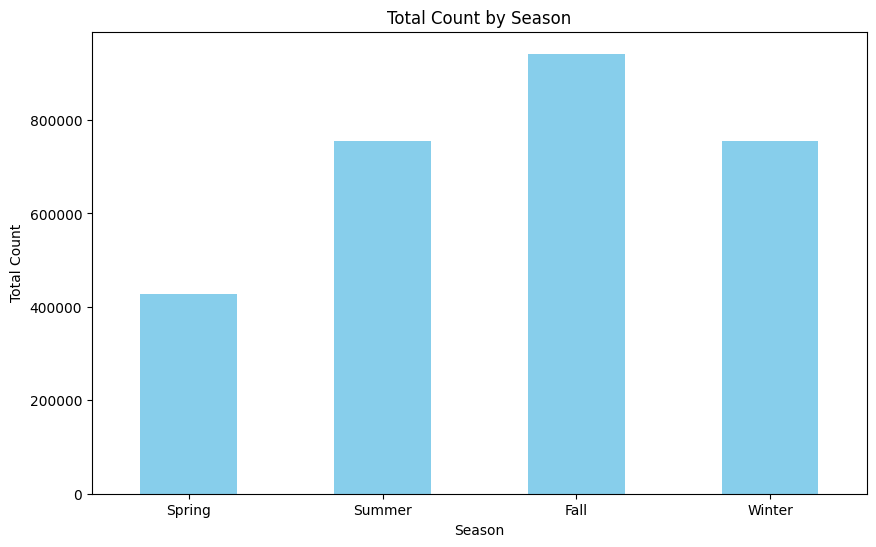

In [17]:
# Map the 'season' values to their corresponding names
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
data['season'] = data['season'].map(season_mapping)

# Define the correct season order
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# Group the data by 'season' and calculate the total 'cnt' for each season
season_cnt = data.groupby('season')['cnt'].sum().reindex(season_order)

# Plot a bar chart
plt.figure(figsize=(10, 6))
season_cnt.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Total Count')
plt.title('Total Count by Season')

# Display the plot
plt.xticks(rotation=0)
plt.show()

**Insight:**
- The most profitable season for bike sharing business is fall, then summer, winter, and spring in corresponding order from highest bike rental count to lowest

## Analisis Lanjutan: RFM Analysis

In [18]:
# Convert the date column to datetime
data['dteday'] = pd.to_datetime(data['dteday'])

# Calculate Recency (days since last rental)
max_date = data['dteday'].max()
data['Recency'] = (max_date - data['dteday']).dt.days

# Calculate Frequency (total count of rentals)
frequency = data.groupby('instant')['cnt'].sum().reset_index()
frequency.rename(columns={'cnt': 'Frequency'}, inplace=True)

# Calculate Monetary (total count)
monetary = frequency.copy()
monetary['Monetary'] = frequency['Frequency']

# Merge the recency, frequency, and monetary data
rfm_data = frequency.merge(data[['instant', 'Recency']], on='instant', how='left').drop_duplicates()
rfm_data['Monetary'] = rfm_data['Frequency']  # Using count as monetary value

# Display RFM Data
print(rfm_data[['instant', 'Recency', 'Frequency', 'Monetary']])

     instant  Recency  Frequency  Monetary
0          1      730        985       985
1          2      729        801       801
2          3      728       1349      1349
3          4      727       1562      1562
4          5      726       1600      1600
..       ...      ...        ...       ...
650      727        4       2114      2114
651      728        3       3095      3095
652      729        2       1341      1341
653      730        1       1796      1796
654      731        0       2729      2729

[655 rows x 4 columns]


## Conclusion

- Conclution pertanyaan 1:
The most optimal temperature for bike sharing business is 25 degree celcius. The closer temperature to 25 degree celcius the higher count of bike rental.
- Conclution pertanyaan 2:
The most profitable season for bike sharing business is fall, then summer, winter, and spring in corresponding order from highest bike rental count to lowest


## Streamlit Dashboard

In [19]:
import streamlit as st

# Convert the date column to datetime
data['dteday'] = pd.to_datetime(data['dteday'])

# Calculate Recency (days since last rental)
max_date = data['dteday'].max()
data['Recency'] = (max_date - data['dteday']).dt.days

# Calculate Frequency (total count of rentals)
frequency = data.groupby('instant')['cnt'].sum().reset_index()
frequency.rename(columns={'cnt': 'Frequency'}, inplace=True)

# Calculate Monetary (total count)
monetary = frequency.copy()
monetary['Monetary'] = frequency['Frequency']

# Merge the recency, frequency, and monetary data
rfm_data = frequency.merge(data[['instant', 'Recency']], on='instant', how='left').drop_duplicates()
rfm_data['Monetary'] = rfm_data['Frequency']  # Using count as monetary value

# Streamlit dashboard
st.title('RFM Analysis Dashboard')

# Display RFM Data
st.subheader('RFM Metrics')
st.write(rfm_data[['instant', 'Recency', 'Frequency', 'Monetary']])

# Summary statistics
st.subheader('Summary Statistics')
st.write(rfm_data.describe())

# Add some visualizations (optional)
st.subheader('Frequency Distribution')
st.bar_chart(rfm_data['Frequency'])

st.subheader('Monetary Distribution')
st.bar_chart(rfm_data['Monetary'])

2024-12-13 20:06:54.629 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 20:06:57.554 
  command:

    streamlit run C:\Users\Labcom.id\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-13 20:06:57.556 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 20:06:57.558 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 20:06:57.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 20:06:57.679 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 20:06:57.681 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 20:06:57.686 

DeltaGenerator()

In [20]:
!streamlit run dashboard.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: dashboard.py
